In [22]:

import re
import torch
import nltk
import string
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import PorterStemmer
from torch.utils.data import Dataset, DataLoader


stopwords = set(stopwords.words('english'))

In [4]:
df = pd.read_csv("sms-spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(columns={'v1' : 'label', 'v2': 'text'})
df['label'].replace({'ham': 0.0, 'spam' : 1.0}, inplace=True)

df.head()

<ipython-input-6-079221d63db9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].replace({'ham': 0.0, 'spam' : 1.0}, inplace=True)
<ipython-input-6-079221d63db9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'].replace({'ham': 0.0, 'spam' : 1.0}, inplace=True)


,label,text
0,0.0,"Go until jurong point, crazy.. Available only ..."
1,0.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.0,U dun say so early hor... U c already then say...
4,0.0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df= df.drop_duplicates(keep= 'first')

df

,label,text
0,0.0,"Go until jurong point, crazy.. Available only ..."
1,0.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.0,U dun say so early hor... U c already then say...
4,0.0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1.0,This is the 2nd time we have tried 2 contact u...
5568,0.0,Will Ì_ b going to esplanade fr home?
5569,0.0,"Pity, * was in mood for that. So...any other s..."
5570,0.0,The guy did some bitching but I acted like i'd...


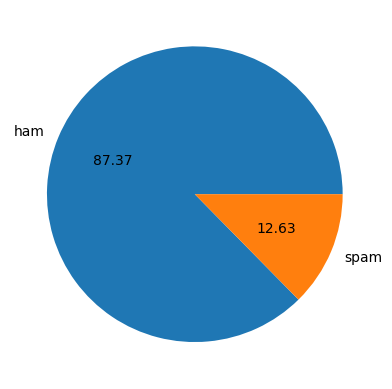

In [8]:
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:

stemmer = PorterStemmer()
lemmetizer = nltk.stem.WordNetLemmatizer()

In [23]:
def preprocess_text(text):
  text = text.lower()

  text = nltk.word_tokenize(text)

  no_specialchar =[]
  for word in text:
    if word.isalnum() and word not in string.punctuation:
      no_specialchar.append(word)
  text = no_specialchar[:]

  no_stopwords = []
  for word in text:
    if word not in stopwords:
      no_stopwords.append(word)
  text = no_stopwords[:]

  stemmed = []
  for word in text:
    stemmed.append(stemmer.stem(word))
  text = stemmed[:]

  return text


def create_vocabulary(processed_text):
  vocabulary = Counter()
  for text in processed_text:
    vocabulary.update(text)
  return list(vocabulary.keys())

def text_to_feature(processed_text, vocabulary):
  features = {}
  for word in vocabulary:
      features[word] = processed_text.count(word)
  return features



In [19]:
!pip install nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
processed_messages = [preprocess_text(text) for text in df['text']]
vocab = create_vocabulary(processed_messages)
feature_sets = [text_to_feature(processed_msg, vocab) for processed_msg in processed_messages]

In [26]:
y = df['label'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(feature_sets, y, test_size= 0.2, random_state= 32)

In [29]:
import math

In [34]:
class NaiveBayesClassifier:
  def __init__(self):
    self.prior = {}
    self.likelihood = {}
    self.vocabulary = set()

  def _find_class_count(self, labels):
    class_count = Counter(labels)
    total = len(labels)
    self.prior = {label: count / total for label, count in class_count.items()}
    return class_count

  def _find_word_count(self, features, labels):
    word_count = {label: Counter() for label in set(labels)}
    for i, bow in enumerate( features):
      label = labels[i]
      for word, count in bow.items():
        word_count[label][word] += count
        self.vocabulary.add(word)
    return word_count

  def fit(self, features, labels):
    class_count = self._find_class_count(labels)
    word_count = self._find_word_count(features, labels)
    total_words_per_class = {label: sum(counts.values()) for label, counts in word_count.items()}
    vocab_size = len(self.vocabulary)
    alpha =1

    self.likelihood = {}
    for label in self.prior:
      self.likelihood[label] = {}
      for word in self.vocabulary:
        count = word_count[label].get(word,0)
        self.likelihood[label][word] = (count + alpha) / (total_words_per_class[label] + alpha * vocab_size)

  def predict(self, features):
    predictions = []
    for feat_vector in features:
      log_probs = {}
      for label , prior in self.prior.items():
        log_prob = math.log(prior)
        for word, count in feat_vector.items():
          if word in self.vocabulary:
            prob = self.likelihood[label].get(word, 1e-1)
            log_prob += count * math.log(prob)
        log_probs[label] = log_prob
      predictions.append(max(log_probs,key =  log_probs.get))
    return predictions


In [35]:
classifier = NaiveBayesClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [36]:
from sklearn.metrics  import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
def evaluation(actual, predicted):
  correct = 0
  for a, p in zip(actual, predicted):
    if a==p:
      correct += 1

  accuracy = correct / len(actual)
  print(f"\nAccuracy : {accuracy:.4f}")

  print(classification_report(actual, predicted, target_names=['ham', 'spam']))


evaluation(y_test, predictions)


Accuracy : 0.9729
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       921
        spam       0.85      0.92      0.88       113

    accuracy                           0.97      1034
   macro avg       0.92      0.95      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [50]:
#try out

message = "Congratulations! You've won a ₹1,00,000 prize! Claim now by clicking here: <link>. Reply YES to confirm."

processed_msg = preprocess_text(message)
message = text_to_feature(processed_msg, vocab)
predictions = classifier.predict([message])

print("Prediction: "+ "spam" if int(predictions[0]) == 1 else "not spam")

Prediction: spam
